In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student = pd.read_excel("student_marks.xlsx")

student.head()

,StudentID,Name,Maths,Science,English,History,Computer
0,1,Aarav,46,60,22,41,28
1,2,Ishaan,29,96,87,96,96
2,3,Vihaan,28,24,59,50,86
3,4,Kabir,36,92,34,69,90
4,5,Arjun,91,80,39,83,68


In [2]:
print(student.columns)

Index(['StudentID', 'Name', 'Maths', 'Science', 'English', 'History',
       'Computer'],
      dtype='object')


In [3]:
marks_columns = ["Maths", "Science", "English", "History", "Computer"]
marks_array = student[marks_columns].to_numpy()

marks_array[:5] 

array([[46, 60, 22, 41, 28],
       [29, 96, 87, 96, 96],
       [28, 24, 59, 50, 86],
       [36, 92, 34, 69, 90],
       [91, 80, 39, 83, 68]])

Highest Marks per Subject: {'Maths': 99, 'Science': 99, 'English': 100, 'History': 100, 'Computer': 96}
Lowest Marks per Subject: {'Maths': 23, 'Science': 21, 'English': 20, 'History': 22, 'Computer': 27}
Class Average per Subject: {'Maths': 58.67, 'Science': 60.53, 'English': 60.03, 'History': 68.07, 'Computer': 60.77}


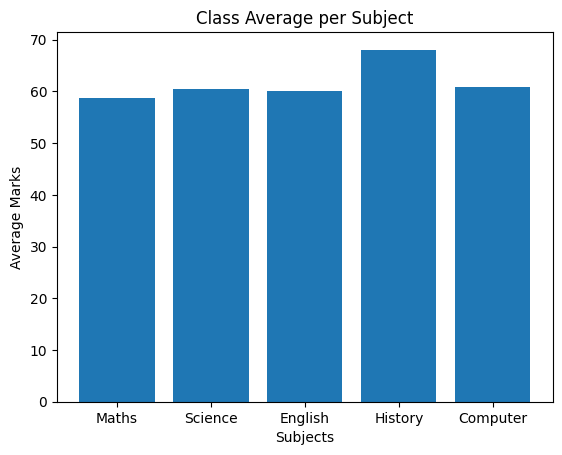

In [ ]:
avg_per_student = np.mean(marks_array, axis=1)


highest_per_subject = np.max(marks_array, axis=0)
highest = dict(zip(marks_columns, highest_per_subject.tolist()))
print("Highest Marks per Subject:", highest)

lowest_per_subject = np.min(marks_array, axis=0)
lowest = dict(zip(marks_columns, lowest_per_subject.tolist()))
print("Lowest Marks per Subject:", lowest)
 
class_avg_per_subject = np.mean(marks_array, axis=0)
class_avg =  dict(zip(marks_columns, np.round(class_avg_per_subject,2).tolist()))
print("Class Average per Subject:", class_avg)


plt.bar(marks_columns, class_avg_per_subject)
plt.title("Class Average per Subject")
plt.ylabel("Average Marks")
plt.xlabel("Subjects")
plt.show()

In [6]:
totalmarks_per_student = np.sum(marks_array, axis=1)


ranks = totalmarks_per_student.argsort()[::-1] 


rank_array = np.empty_like(ranks)
rank_array[ranks] = np.arange(1, len(ranks)+1)



top3_indices = ranks[:3]
bottom3_indices = ranks[-3:]

print("Top 3 Students:")
display(student.loc[top3_indices, ["StudentID", "Name"]].assign(Total=totalmarks_per_student[top3_indices]))

print("\nBottom 3 Students:")
display(student.loc[bottom3_indices, ["StudentID", "Name"]].assign(Total=totalmarks_per_student[bottom3_indices]))


Top 3 Students:


,StudentID,Name,Total
1,2,Ishaan,404
26,27,Pooja,397
21,22,Krishna,391



Bottom 3 Students:


,StudentID,Name,Total
6,7,Diya,219
18,19,Samaira,217
0,1,Aarav,197


In [8]:
pass_fail = np.where((marks_array >= 40).all(axis=1), "Pass", "Fail")


total_passed = np.sum(pass_fail == "Pass")

print("\nTotal Students Passed All Subjects:", total_passed)



Total Students Passed All Subjects: 5


In [9]:
student["Result"] = pass_fail


passed_students = student[student["Result"] == "Pass"]


failed_students = student[student["Result"] == "Fail"]

print("\n Passed Students:")
display(passed_students)

print("\n Failed Students:")
display(failed_students)



 Passed Students:


,StudentID,Name,Maths,Science,English,History,Computer,Result
7,8,Meera,77,57,74,93,74,Pass
12,13,Yash,77,74,96,56,51,Pass
17,18,Tanvi,63,60,47,88,94,Pass
21,22,Krishna,77,80,84,72,78,Pass
26,27,Pooja,99,90,65,74,69,Pass



 Failed Students:


,StudentID,Name,Maths,Science,English,History,Computer,Result
0,1,Aarav,46,60,22,41,28,Fail
1,2,Ishaan,29,96,87,96,96,Fail
2,3,Vihaan,28,24,59,50,86,Fail
3,4,Kabir,36,92,34,69,90,Fail
4,5,Arjun,91,80,39,83,68,Fail
5,6,Ananya,97,51,31,22,56,Fail
6,7,Diya,71,39,29,51,29,Fail
8,9,Riya,88,63,87,64,29,Fail
9,10,Kavya,90,65,49,31,29,Fail
10,11,Aditya,58,55,90,98,33,Fail


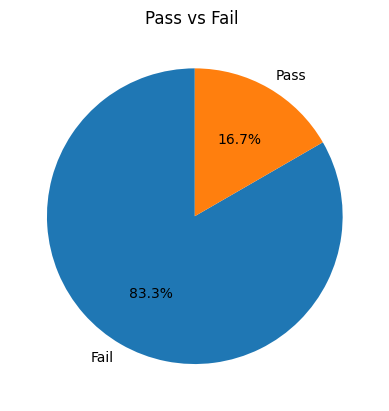

In [19]:
pass_fail_counts = student["Result"].value_counts()

plt.pie(pass_fail_counts, labels=pass_fail_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Pass vs Fail ")
plt.show()

In [22]:
student["TotalMarks"] = totalmarks_per_student
student["AverageMarks"] = np.round(avg_per_student, 2)
student["Result"] = pass_fail
student["Rank"] = rank_array


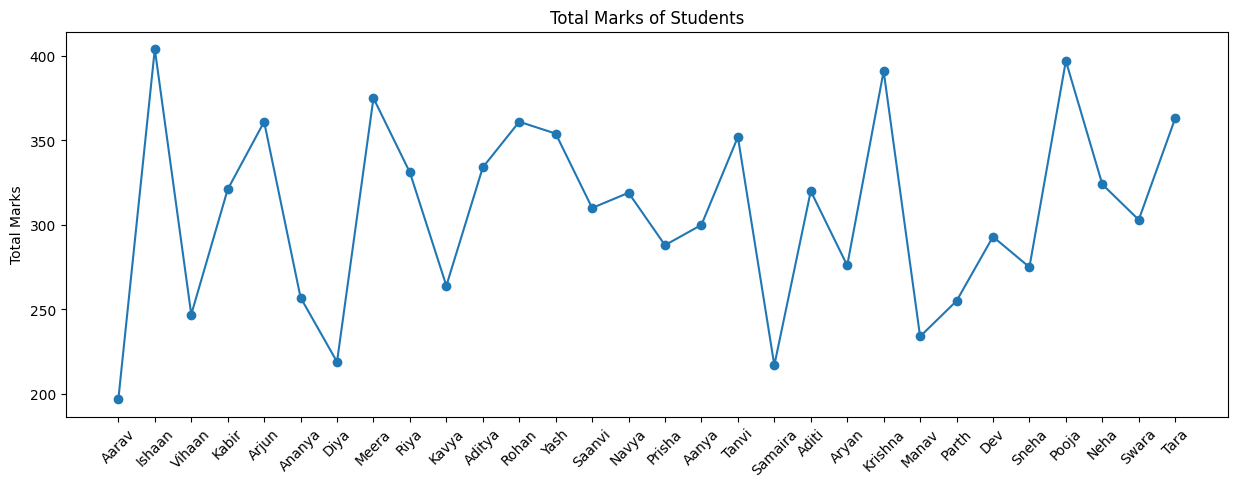

In [38]:
plt.figure(figsize=(15, 5)) 
plt.plot(student["Name"], student["TotalMarks"], marker="o",)
plt.title("Total Marks of Students")
plt.xticks(rotation=45)
plt.ylabel("Total Marks")
plt.show()


In [49]:
with pd.ExcelWriter("student_report.xlsx", engine="openpyxl") as writer:
    student.to_excel(writer, sheet_name="All Students", index=False)
    passed_students.to_excel(writer, sheet_name="Passed Students", index=False)
    failed_students.to_excel(writer, sheet_name="Failed Students", index=False)

print("✅ Data successfully written to student_report.xlsx")


✅ Data successfully written to student_report.xlsx


In [ ]:
#matplotlib